In [11]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import astropy.units as u
import pickle, json, warnings, astropy, os
from matplotlib.colors import LogNorm
from astropy.io.votable import parse
import mosaic_tools as mt
import pdb
%matplotlib inline

# Plotting Tools

In [12]:
PT = mt.PlottingTools()

def linePlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0
    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)
    
    return ax

def scatterPlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):

    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0
    
    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,linestyle='None',**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)

    return ax

def histPlot(xdat,bins=15,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0

    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'
    
    ax.hist(xdat,bins,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)    
    
    return ax
        

"""
E.g.

kw = {'markersize':10,'color':'magenta','marker':'D','alpha':.4}
sp = scatterPlot(Mp/Mj,Rp/Rj,labels=('x','y'),xlog=True,**kw)
sp.saveplot('filename.jpg') --> sp is now an plot-axis object.

kw = {'markersize':10,'color':'red','marker':'o','linewidth':2,'ls':'--','alpha':.4}
lp = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)

kw = {'markersize':10,'color':'red','linewidth':2,'ls':'--','alpha':.4}
lp2 = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)

kw = {'histtype':'step','normed':True}
bins = np.linspace(np.array(Mp/Mj).min(),np.array(Mp/Mj).max(),20)
hp = histPlot(Mp/Mj,bins=bins,labels=('mass','count'),**kw)

"""    

## Load Completeness and Simulation Results

In [3]:
baseFolder = '/Users/rpatel/Dropbox/Research/WFIRST/EXOSIMSTesting/'
resultFolder = os.path.join(baseFolder,'SimResults')
scriptFolder = os.path.join(baseFolder,'scripts')
compFolder = os.path.join(baseFolder,'Completeness')
# ===============  LOAD JSON SCRIPT FILE =================

# jfile = 'template_WFIRST_KeplerLike.json'
# jfile = 'template_WFIRST_EarthTwinHabZone.json'
# jfile = 'template_WFIRST_KnownRV.json'
# jfile = 'template_rpateltest_KnownRV.json'
jfile = 'template_rpateltest_KnownRV_2years.json'
scriptfile = os.path.join(scriptFolder,jfile)
script = open(scriptfile).read()
specs_from_file = json.loads(script)

# ===============  LOAD COMPLETENESS FILE ===============

# cfile = 'EarthTwinHabZone2.comp'
# cfile = 'KeplerLike1.comp'
cfile = 'KnownRVPlanets_2yrs_5E+07stars_rpateltest.comp'
fle = os.path.join(compFolder,cfile)
dataCOMP = pickle.load(open(fle,'rb'))

# ===============  LOAD SIMULATION RESULTS ===============

#simresults = 'simresults_2yrs_5E+07stars_rpateltest_KnownRV.pickle'
#simresults = 'simresults_0.20yrs_rpateltest_KnownRV.pickle'
simresults = 'simresults_2.00yrs_rpateltest_KnownRV_2year.pickle'
basesim =  simresults.strip('simresults_').strip('.pickle')

simfile = os.path.join(resultFolder,simresults)
simr = pickle.load(open(simfile,'rb'))

print 'Upper level keys: \n\t', simr.keys()

Upper level keys: 
	['star_prop', 'DRM', 'empplanet_prop', 'synplanet_prop', 'AllSpecs']


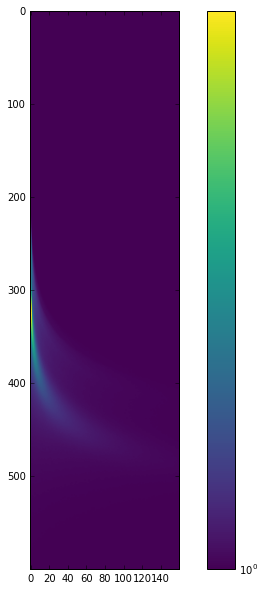

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(dataCOMP[0:600,0:160] + 1,cmap='viridis',norm=LogNorm())
plt.colorbar()
#plt.clim(1.7,2)

## Stellar Data

In [4]:
sp = simr['star_prop']
print 'Star property keys: \n\t', sp.keys()

Star property keys: 
	['Bmag', 'dist', 'BV', 'Binary_Cut', 'Spec', 'rv', 'Vmag', 'Imag', 'Kmag', 'Lum', 'pmdec', 'MsEst', 'Name', 'nStars', 'Jmag', 'Hmag', 'parx', 'MsTrue', 'Umag', 'comp0', 'MV', 'coords', 'pmra']


## Simulated Planet Data

In [5]:
pd_s = simr['synplanet_prop']
if pd_s is not None:
    print 'Simulated Planet property keys: \n\t', pd_s.keys()
else: print 'No simulated planets from this simulation'

No simulated planets from this simulation


## Empirical Planet Data

In [6]:
pd_e = simr['empplanet_prop']
if pd_e is not None:
    print 'Empirical Planet property keys: \n\t', pd_e.keys()
else: print 'No empirical planets from this simulation'

Empirical Planet property keys: 
	['Rp', 'I', 'fEZ', 'v', 'sInds', 'O', 'p', 'r', 'Mp', 'w', 'nplans', 'e', 'plan2star', 'sma']


## DRM and Specs of simulation

In [7]:
DRM = simr['DRM']
AllSpecs = simr['AllSpecs']

In [43]:
AllSpecs

{'FAP': 3e-07,
 'IWA': 0.0,
 'Irange': array([   0.,  180.]),
 'MDP': 0.001,
 'Mprange': array([  1.00000000e+00,   4.13100000e+03]),
 'Ndark': 10.0,
 'OWA': inf,
 'Orange': array([   0.,  360.]),
 'Rprange': array([ 0.001 ,  0.0226]),
 'arange': array([   0.1,  100. ]),
 'attenuation': 0.441,
 'coMass': 5800.0,
 'constrainOrbits': False,
 'currentTimeAbs': 60634.0,
 'currentTimeNorm': 0.0,
 'dMagLim': 21.0,
 'defburnPortion': 0.05,
 'dryMass': 3400.0,
 'dtAlloc': 1.0,
 'duration': 50.0,
 'erange': array([ 0.01,  0.99]),
 'eta': 0.1,
 'extendedLife': 0.0,
 'fEZ0': 1.584893192461111e-09,
 'fZ0': 6.309573444801917e-10,
 'flowRate': 0.95304246059091,
 'haveOcculter': False,
 'havejplephem': True,
 'intCutoff': 50.0,
 'keepStarCatalog': True,
 'magEZ': 22.0,
 'magZ': 23.0,
 'minComp': 0.0,
 'missionFinishAbs': 61364.5,
 'missionFinishNorm': 730.5,
 'missionLife': 2.0,
 'missionPortion': 0.167,
 'missionStart': 60634.0,
 'modules': {'BackgroundSources': 'GalaxiesFaintStars',
  'Completeness

In [44]:
DRM[0]

{'arrival_time': 2.0,
 'char_SNR': [1.565968784299306e-05],
 'char_WA': [9.972341109648776],
 'char_dMag': [18.25821483412576],
 'char_fEZ': [1.9730076784121666e-08],
 'char_mode': {'BW': 0.18,
  u'SNR': 10.0,
  'deltaLam': <Quantity 118.8 nm>,
  'detectionMode': False,
  u'instName': u'spectro-CCD',
  'lam': <Quantity 660.0 nm>,
  u'systName': u'SPC-660',
  'timeMultiplier': 1.0},
 'char_status': [0.0],
 'char_time': 1.757692229718127e-10,
 'det_SNR': [11415.91957266009],
 'det_WA': [9.971523079974977],
 'det_dMag': [18.25798330702609],
 'det_fEZ': [1.9731605604363154e-08],
 'det_status': [1],
 'det_time': 0.014569541222148263,
 'plan_inds': [183],
 'star_ind': 140}

In [8]:
Mprange = AllSpecs['Mprange']
arange = AllSpecs['arange']

# indices of targets observed in order including repeats
target_obsind = np.array([dt['star_ind'] for dt in DRM])

# indices of all planets detected for each star.
try: 
    detind_pl = np.array([list(dt['plan_inds']) for dt in DRM])
    detind_plc = np.concatenate(detind_pl).astype('int32')
except: print 'No planets detected?'

#arrival time array
arrival_time = np.array([dt['arrival_time'] for dt in DRM])

# angular distance of each detection ? mas
#det_wa = np.array([dt['det_WA'] for dt in DRM])

# status of any detections
det_status = np.array([dt['det_status'] for dt in DRM])

# detection of planets

target_observed = sp['Name'][target_obsind]
detstatus_array = np.array([ dt['det_status'] for dt in DRM])

## Target Plots

### Red circles are targets that were observed

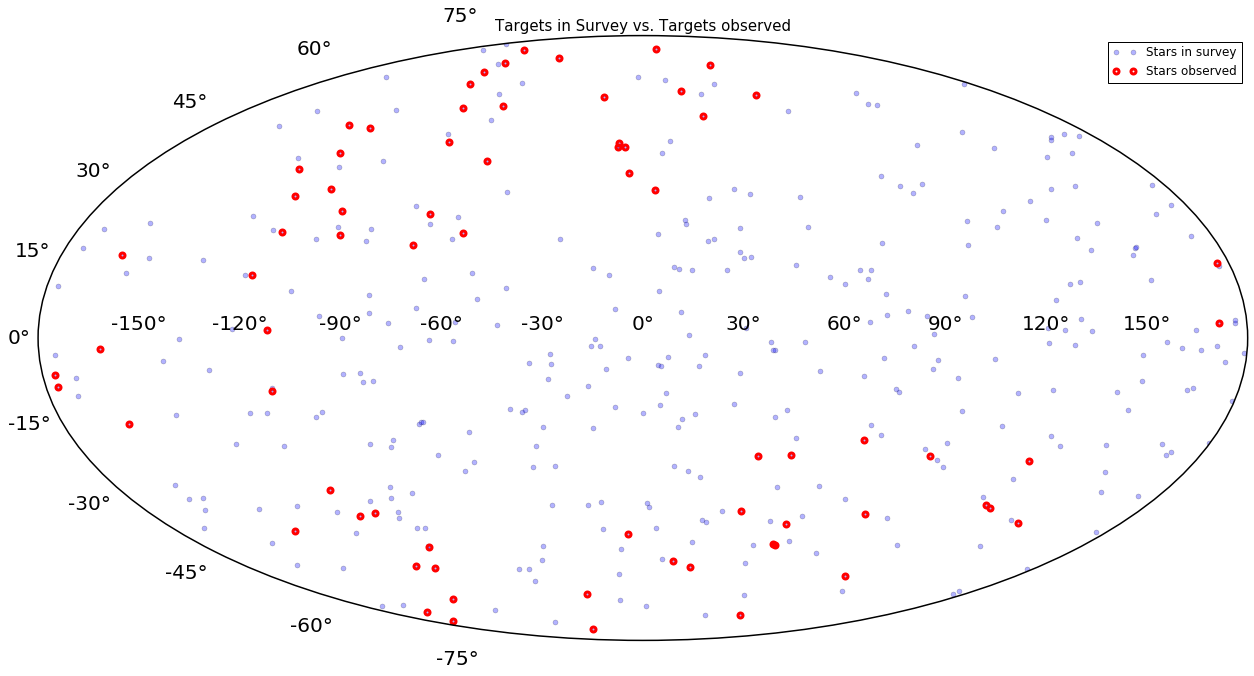

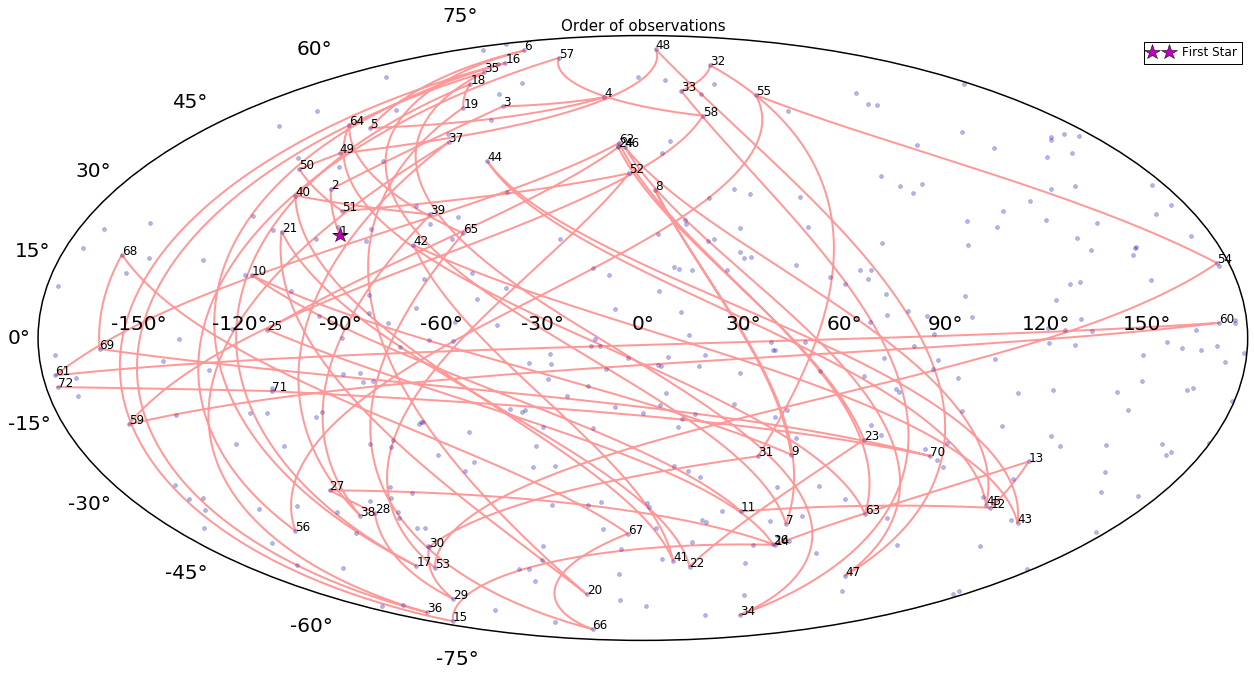

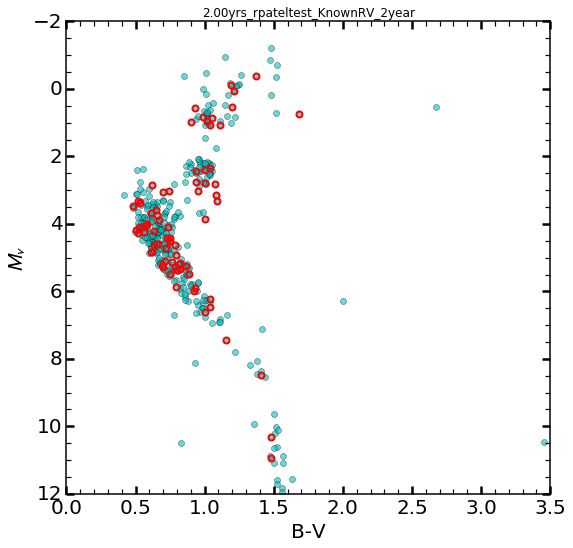

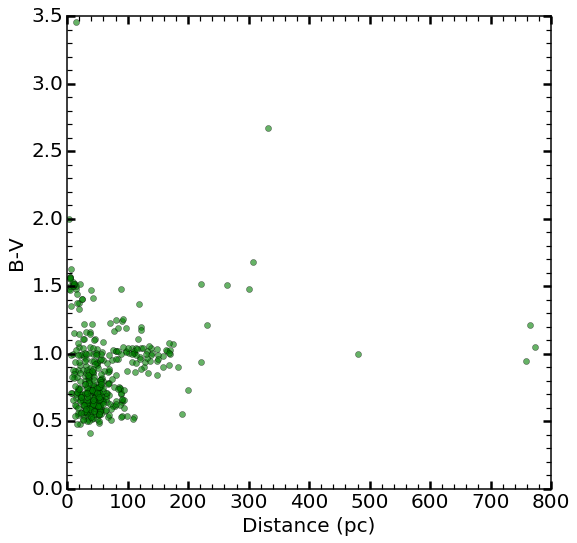

In [16]:
# SKY DISTRIBUTION OF TARGETS
save_plots = False
dirsave = os.path.join(baseFolder,'SimPlots')

coords = sp['coords']
ra_rad, dec_rad = coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian
BV, MV = sp['BV'], sp['MV']
dist = sp['dist']

# ==================================================================================================================
# ==================================================================================================================
axt = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt)
axt.plot(ra_rad,dec_rad,'o',ms=5,alpha=0.3,label='Stars in survey')
axt.plot(ra_rad[target_obsind],dec_rad[target_obsind],'ro',ms=5,mfc='none',mec='r',mew=3,label='Stars observed')
#axt.set_title('Targets in Survey vs. Targets observed; %s' %basesim)    
axt.set_title('Targets in Survey vs. Targets observed',fontsize=15)
plt.legend()
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_%s.png'%basesim))

# ==================================================================================================================
#         Observation Order
# ==================================================================================================================
axt2 = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt2)
axt2.plot(ra_rad,dec_rad,'bo',ms=4,alpha=0.3)
axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'r-',mew=2,lw=2,alpha=0.4)

for i,j in enumerate(target_obsind):
    if i == 0:
        axt2.plot(ra_rad[j],dec_rad[j],'m*',ms=16,label='First Star')
    axt2.text(ra_rad[j],dec_rad[j],str(i+1),color='k',fontsize=12)
plt.title('Order of observations',fontsize=15)    
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_order_%s.png'%basesim))
plt.legend()

# ==================================================================================================================
#         CMD
# ==================================================================================================================
kw = {'markersize':6,'color':'c','marker':'o','alpha':.6}
axbv = scatterPlot(BV,MV,labels=('B-V','$M_v$'),**kw)
axbv.plot(BV[target_obsind],MV[target_obsind],'ro',markersize=6,mfc='none',mec='r',mew=2)
axbv.set_ylim(axbv.get_ylim()[::-1])
axbv.set_title('%s' %basesim)          
if save_plots: axbv.savefig(os.path.join(dirsave,'target_CMD_%s.png'%basesim))

# ==================================================================================================================
#            DISTANCE VS. B-V
# ==================================================================================================================

kw = {'markersize':6,'color':'g','marker':'o','alpha':.6}
axbvd = scatterPlot(dist,BV,labels=('Distance (pc)','B-V'),**kw)
#axbvd.plot(dist[target_obsind],BV[target_obsind],'ro',ms=6,mfc='none',mec='r',mew=2)
#axbvd.set_title('%s'%basesim)
#if save_plots: axbvd.savefig(os.path.join(dirsave,'target_dist_v_B-V_%s.png'%basesim))


## Planet Plots

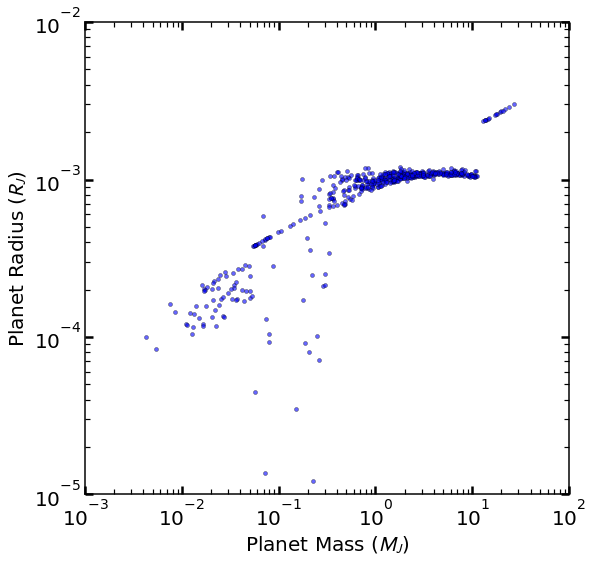

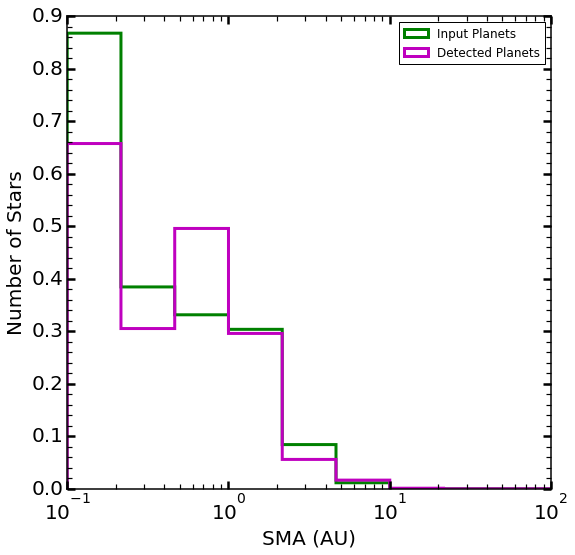

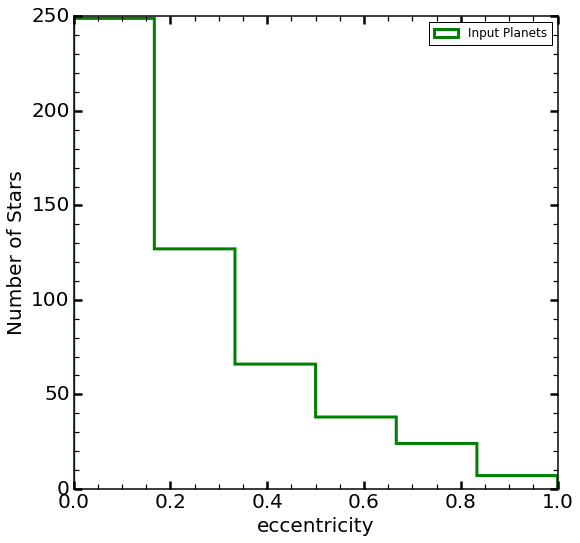

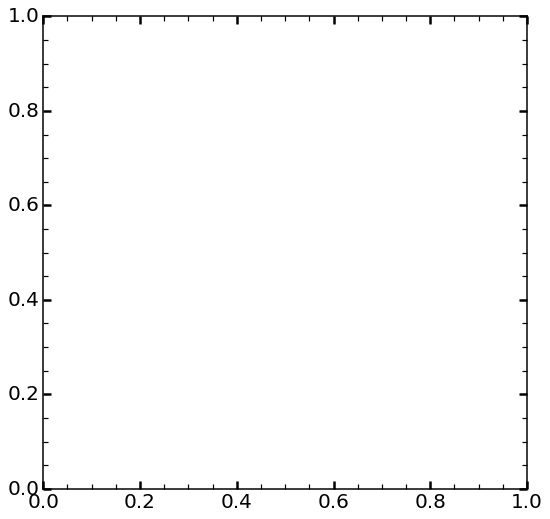

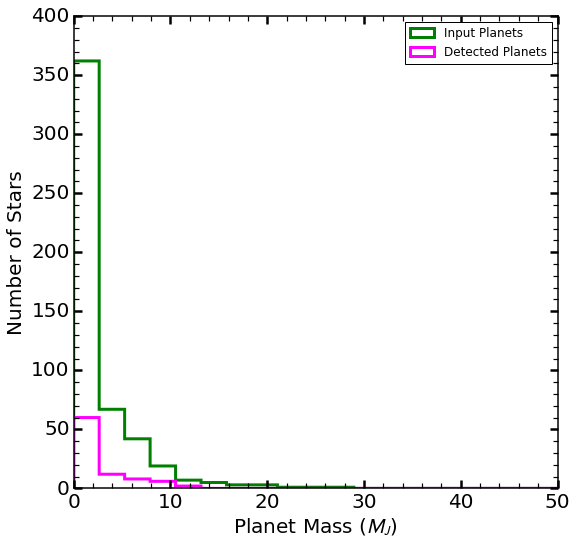

In [19]:
Rj = 69.911e6 #meters
Mj = 1.898e27 #Kg

# BINS & DATA
Mp,Rp = pd_e['Mp'], pd_e['Rp']
sma,ecc = pd_e['sma'], pd_e['e']
ebins = np.linspace(0,1,7)
logarange = np.log10(arange)
smabins = np.logspace(logarange[0],logarange[1],10)
massbins = np.linspace(.001,50,20)

# MASS VS. RADIUS OF PLANETS
kw = {'markersize':4,'color':'b','marker':'o','alpha':.6}
axp = scatterPlot(Mp/Mj,Rp/Rj,labels=('Planet Mass ($M_J$)','Planet Radius ($R_J$)'),
                  xlog=True, ylog=True,**kw)
if save_plots: axp.savefig(os.path.join(dirsave,'planet_R_v_M_%s.png'%basesim))


# HISTOGRAM OF SMA
kw = {'histtype':'step','normed':True,'lw':3,'color':'g','label':'Input Planets'}
axps = histPlot(sma,bins=smabins,labels=('SMA (AU)','Number of Stars'),
                xlog=True,**kw)
kw = {'histtype':'step','normed':True,'lw':3,'color':'m','label':'Detected Planets'}
axps = histPlot(sma[detind_plc],smabins,axps,labels=('SMA (AU)','Number of Stars'),
                xlog=True, **kw)
plt.legend()
if save_plots: axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))


# HISTOGRAM OF ECCENTRICITY
kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
axe = histPlot(ecc,bins=ebins,labels=('eccentricity','Number of Stars'),**kw)
axe.hist(ecc[detind_plc],bins=ebins,histtype='step',lw=3,color='m',label='Detected Planets');
plt.legend()
if save_plots: axe.savefig(os.path.join(dirsave,'planet_ecc_distribution_%s.png'%basesim))

# HISTOGRAM OF PLANET MASS
kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
axps = histPlot(Mp/Mj,bins=massbins,
                labels=(r'Planet Mass ($M_J$)','Number of Stars'),**kw)
axps.hist(Mp[detind_plc]/Mj,bins=massbins,histtype='step',lw=3,color='magenta',label='Detected Planets');
plt.legend()
if save_plots:axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))



